## Decision Tree Classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [4]:
# Load the dataset
df = pd.read_csv('Renewable_Energy_Adoption.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [5]:
df.tail()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0
99,87.761999,801.887991,0.085347,3.895443,0


In [7]:
# Feature Selection
X = df.drop('adoption', axis = 1)
y = df['adoption']

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8,random_state=42)

In [20]:
# Initialize the model with a specified max depth to prevent onerfitting
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [22]:
#Metrics
#Accuracy score
acc= accuracy_score(y_test,y_pred)
print(f"Accuracy Score is {acc}")

Accuracy Score is 0.85


In [23]:
# COnfusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[16,  1],
       [ 2,  1]])

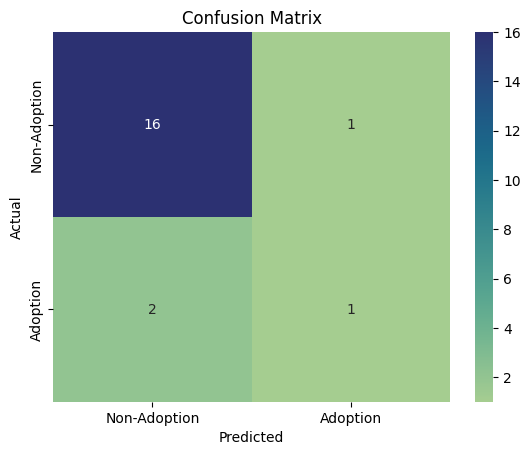

In [26]:
sns.heatmap(cm, annot=True, fmt='d',cmap='crest',
           xticklabels=['Non-Adoption', 'Adoption'],
           yticklabels=['Non-Adoption', 'Adoption'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Classificaation Report
print(classification_report(y_test,y_pred, target_names=['Non-Adoption', 'Adoption']))

              precision    recall  f1-score   support

Non-Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [29]:
# Model Deployment
import joblib
joblib.dump(model, 'DTC_REAdoption.pkl')

['DTC_REAdoption.pkl']

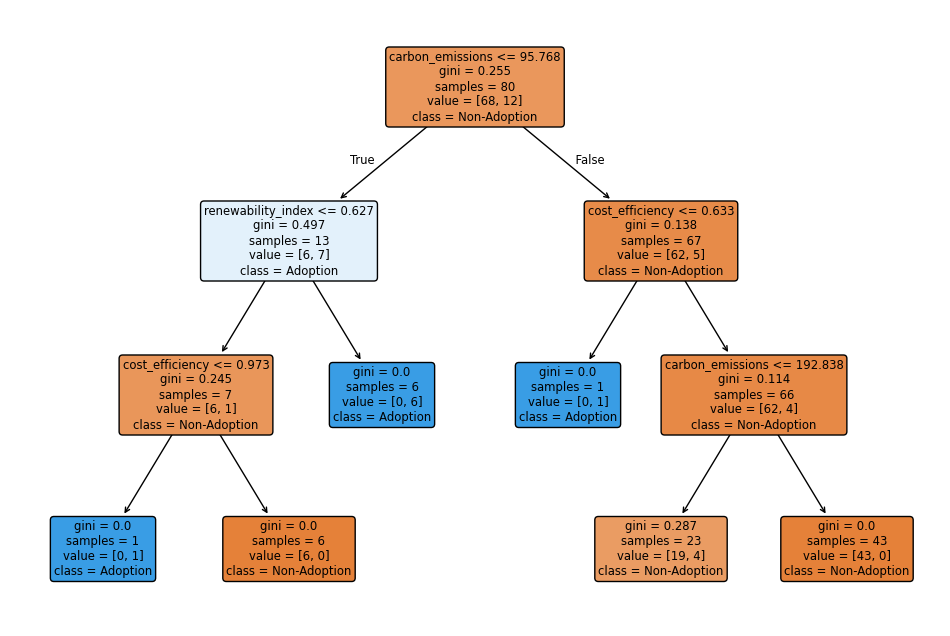

In [31]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['Non-Adoption', 'Adoption'],
          filled=True, rounded=True)
plt.show()